In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mt

tabel = pd.read_csv('/home/nstrtm/Documents/bezdekiris.csv', header=None, nrows=100)
tabel[4] = tabel[4].str.replace('Iris-setosa','1')
tabel[4] = tabel[4].str.replace('Iris-versicolor','0')

tabel = tabel.astype('float64')

In [3]:
#Inisiasi
alpha = 0.1

teta = np.array([0.1,0.15,0.2,0.3])

pteta= pd.DataFrame(data=teta)

global bias
bias = 0.4

d_bias = 0

h = 0

array_dteta = np.empty(4)

array_x = np.array(tabel.iloc[0,:4])

fakta = tabel.iloc[0,4]

jumlah_error_semua = np.zeros(shape=(60,1))

In [4]:
#by def
def h(x,teta,b,a):
    return np.dot(x.iloc[a,:4],np.transpose(teta)+bias)

def sigmoid(h):
    return 1/(1+mt.exp(h))

def error(sigmoid,a):
    return (sigmoid-tabel.iloc[a,4])**2

def prediksi(sigmoid):
    if sigmoid <= 0.5:
        prediksi = 1
        return prediksi
    else:
        prediksi = 0
        return prediksi
    
def d_teta(sigmoid,fakta,array_x,i):
    return 2*(sigmoid-fakta)*(1-sigmoid)*sigmoid*array_x[i]
    
def d_bias(sigmoid,fakta):
    return 2*(sigmoid-fakta)*(1-sigmoid)*sigmoid

def teta_baru(teta,alpha,d_teta,i):
    return teta[i]-(alpha*d_teta[i])

def bias_baru(bias,alpha,d_bias):
    return bias-(alpha*d_bias)

def tukar_bias(bias,alpha,d_bias_rumus):
    bias= bias_baru(bias,alpha,d_bias_rumus)
    
def jumlah_error_epoch(error):
    jumlah = jumlah + error
    
def restart_jumlah(i):
    jumlah_error_semua[i]=jumlah.copy
    

In [9]:
def epoch() :
    global jumlah
    jumlah=0
    diulang = 60
    for m in range(diulang):
        
        for i in tabel:
            h_rumus = h(tabel,teta,bias,i).astype('float64')
            sigmoid_rumus = sigmoid(h_rumus)
            error_rumus= error(sigmoid_rumus,i)
            jumlah += error_rumus
            prediksi_rumus = prediksi(sigmoid_rumus)
            for j in range(len(array_x)):
                array_dteta[j] = d_teta(sigmoid_rumus,fakta,array_x,j)
            d_bias_rumus = d_bias(sigmoid_rumus,fakta)
            for j in range(len(teta)):
                teta[j]= teta_baru(teta,alpha,array_dteta,j)
            tukar_bias(bias,alpha,d_bias_rumus)
        jumlah_error_semua[m]=jumlah
        jumlah=0
        print(jumlah_error_semua[m])
    plt.plot(jumlah_error_semua)
    plt.ylabel('error')
    plt.xlabel('epoch')
    plt.show()

[4.99595231]
[4.99601335]
[4.99607258]
[4.99613007]
[4.9961859]
[4.99624014]
[4.99629285]
[4.99634411]
[4.99639397]
[4.99644249]
[4.99648972]
[4.9965357]
[4.9965805]
[4.99662416]
[4.99666671]
[4.9967082]
[4.99674867]
[4.99678816]
[4.99682669]
[4.99686432]
[4.99690106]
[4.99693695]
[4.99697201]
[4.99700629]
[4.99703979]
[4.99707255]
[4.9971046]
[4.99713595]
[4.99716663]
[4.99719665]
[4.99722605]
[4.99725483]
[4.99728303]
[4.99731065]
[4.99733771]
[4.99736424]
[4.99739024]
[4.99741573]
[4.99744073]
[4.99746525]
[4.9974893]
[4.9975129]
[4.99753606]
[4.9975588]
[4.99758111]
[4.99760303]
[4.99762455]
[4.99764568]
[4.99766644]
[4.99768684]
[4.99770689]
[4.99772659]
[4.99774595]
[4.99776499]
[4.99778371]
[4.99780212]
[4.99782022]
[4.99783803]
[4.99785554]
[4.99787278]


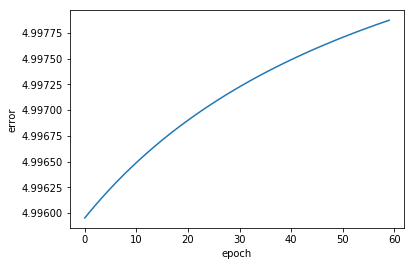

In [7]:
epoch()

In [8]:
type(jumlah)

